Decision Tree Classifier complet

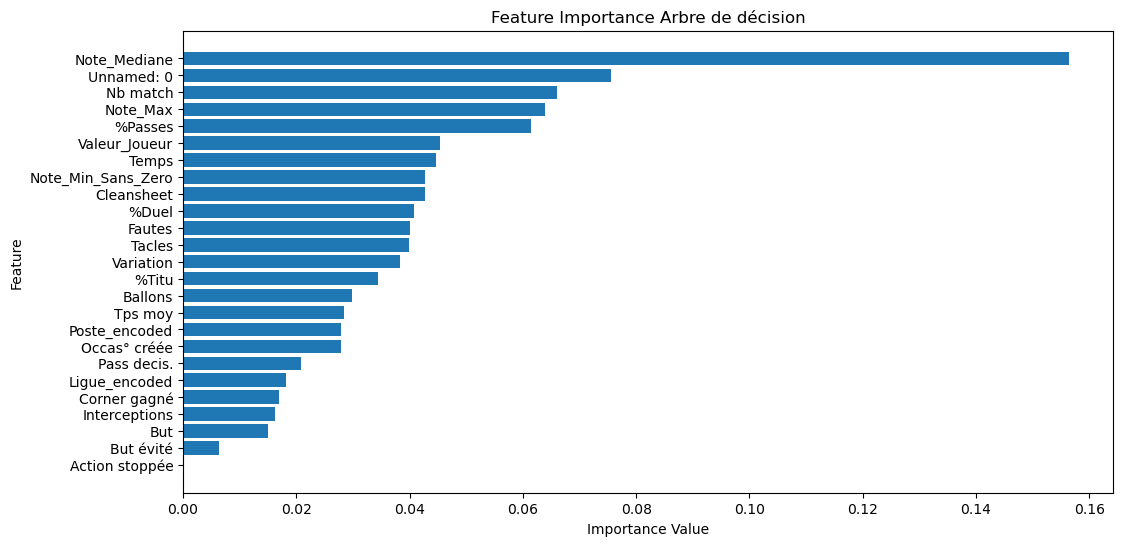

In [1]:
#Import des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

#Import des données
df = pd.read_csv(r"C:\Users\Dylan\Desktop\Portfolio\MPG\MPG ENCODED.csv")

#Division des données
X = df.drop('Note_encoded', axis=1)
y = df['Note_encoded']

#Entrainement du modèle
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

#Création du modèle d'arbre de décision
model = DecisionTreeClassifier()

#Entrainement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

#Récupération de l'importance des caractéristiques
importances = model.feature_importances_

#Association des importances aux noms des caractéristiques
feature_names = X.columns

#Création d'un DataFrame pour afficher les importances par caractéristique
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

#Tri des caractéristiques par importance décroissante
importance_df = importance_df.sort_values(by='Importance', ascending=False)

#Affichage des importances dans un graphique
plt.figure(figsize=(12, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance Value')
plt.ylabel('Feature')
plt.title('Feature Importance Arbre de décision')
plt.gca().invert_yaxis()
plt.show()


Visualisation de l'arbre sur 3 niveaux

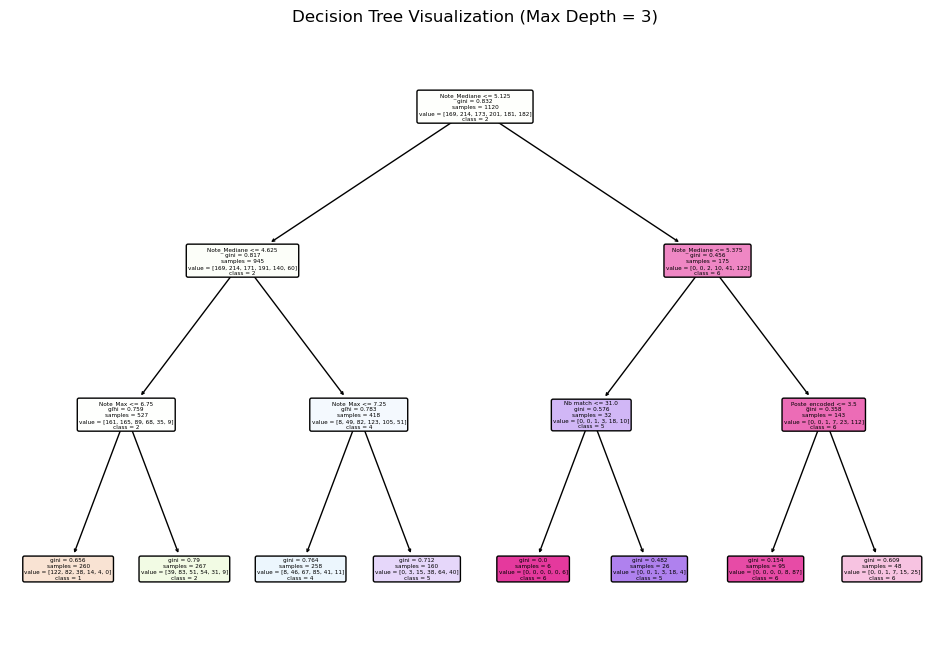

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

#Création d'un modèle d'arbre de décision limité à trois niveaux de profondeur
model = DecisionTreeClassifier(max_depth=3)

#Entrainement du modèle sur les données d'entraînement
model.fit(X_train, y_train)

#Affichage de l'arbre de décision
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=X.columns, class_names=list(map(str, model.classes_)), filled=True, rounded=True)
plt.title('Decision Tree Visualization (Max Depth = 3)')
plt.show()


Affichage des scores train et test

In [3]:
print('Score sur ensemble train', model.score(X_train, y_train))

print('Score sur ensemble test', model.score(X_test, y_test))

Score sur ensemble train 0.4375
Score sur ensemble test 0.39037433155080214


Affichage des scores de classification

In [4]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix

#Création du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

#Entrainement du modèle
model.fit(X_train, y_train)

#Obtention des prédictions
y_pred = model.predict(X_test)

#Calcul des métriques de classification
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

#Affichage des métriques
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.40641711229946526
Precision: 0.41868806443053025
Recall: 0.40641711229946526
F1 Score: 0.40996150655001107


Affichage de la matrice de confusion

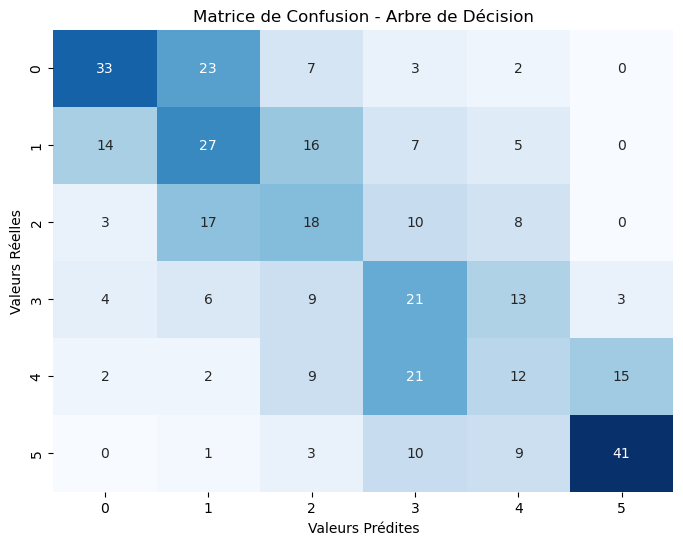

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

#Création du modèle d'arbre de décision
model = DecisionTreeClassifier(random_state=42)

#Entrainement du modèle
model.fit(X_train, y_train)

#Obtention des prédictions
y_pred = model.predict(X_test)

#Calcul de la matrice de confusion
confusion = confusion_matrix(y_test, y_pred)

#Affichage de la matrice de confusion avec Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Valeurs Prédites')
plt.ylabel('Valeurs Réelles')
plt.title('Matrice de Confusion - Arbre de Décision')
plt.show()